In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = pd.read_json('../data/database-27-10.json')

In [2]:
news.to_csv("../data/database-27-10.csv")

In [5]:
news['content_length'] = news['author'].str.len()

In [6]:
news.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852 entries, 0 to 4851
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype                                
---  ------          --------------  -----                                
 0   sophoraId       4852 non-null   object                               
 1   title           4852 non-null   object                               
 2   content         4852 non-null   object                               
 3   date            4852 non-null   datetime64[ns, pytz.FixedOffset(120)]
 4   firstDownload   4852 non-null   object                               
 5   lastDownload    4852 non-null   object                               
 6   author          4852 non-null   object                               
 7   sender          4852 non-null   object                               
 8   tags            4852 non-null   object                               
 9   geotags         4852 non-null   object                         

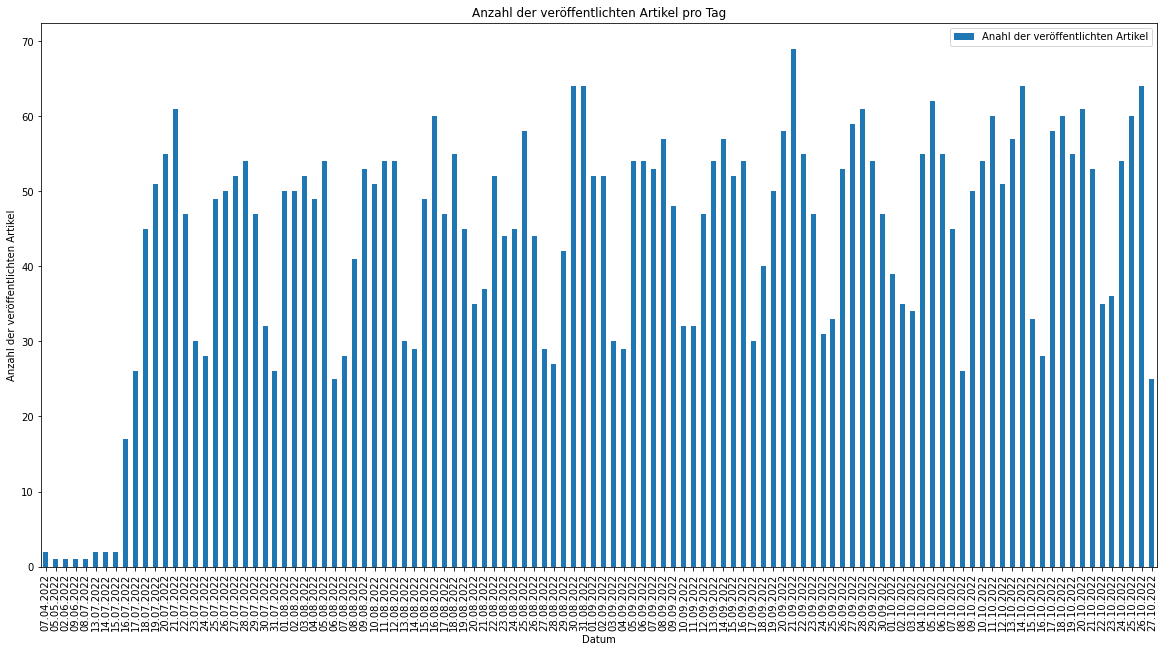

In [3]:
import seaborn as sns  
from matplotlib.dates import DateFormatter
from sklearn.linear_model import Ridge

df = (pd.to_datetime(news['date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count')
       .sort_values('date'))

ax = df.plot(kind='bar', label="Anahl der veröffentlichten Artikel", x='date', y='count', figsize=(20, 10))

ax.set_xticklabels(df['date'].dt.strftime('%d.%m.%Y'))
ax.set_title("Anzahl der veröffentlichten Artikel pro Tag")
ax.set_xlabel("Datum")
ax.set_ylabel("Anzahl der veröffentlichten Artikel")

ax.tick_params(axis='both', which='minor', labelsize=6)

plt.show()